In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
cd proj/yolov5/

C:\proj\yolov5


In [ ]:
pip install -r requirements.txt

                                              0.0/184.3 kB ? eta -:--:--
     -----------------------                112.6/184.3 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 184.3/184.3 kB 3.7 MB/s eta 0:00:00
                                              0.0/7.6 MB ? eta -:--:--
     -                                        0.4/7.6 MB 11.2 MB/s eta 0:00:01
     ---                                      0.7/7.6 MB 9.5 MB/s eta 0:00:01
     ------                                   1.1/7.6 MB 9.1 MB/s eta 0:00:01
     --------                                 1.6/7.6 MB 9.0 MB/s eta 0:00:01
     ----------                               2.0/7.6 MB 9.0 MB/s eta 0:00:01
     ------------                             2.3/7.6 MB 8.7 MB/s eta 0:00:01
     --------------                           2.7/7.6 MB 8.6 MB/s eta 0:00:01
     ---------------                          3.0/7.6 MB 8.2 MB/s eta 0:00:01
     -----------------                        3.3/7.6 MB 8.4 MB/s eta 0

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\pc/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-17 Python-3.11.4 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:05<00:00, 2.68MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

image 1/1: 1080x810 4 persons, 1 bus
Speed: 571.2ms pre-process, 66.8ms inference, 7.0ms NMS per image at shape (1, 3, 640, 480)


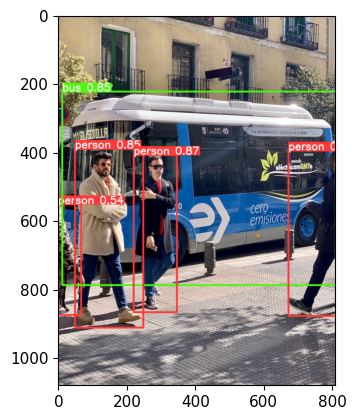

In [ ]:
img= 'https://ultralytics.com/images/bus.jpg'
results = model(img)
results.print()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 300x1140 20 persons
Speed: 789.0ms pre-process, 53.4ms inference, 2.0ms NMS per image at shape (1, 3, 192, 640)


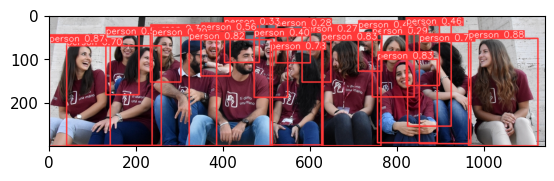

In [ ]:
img2= 'https://web.uniroma1.it/disp/sites/default/files/styles/target_image/public/target_image/dsc_5118_29769557841_o_0_2.jpg?itok=w2tNQ8-k'
results = model(img2)
results.print()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

real time detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

awake or tired? make dataset

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data2', 'images') #/data/images
labels = ['awake', 'tired']
number_imgs = 50

remember to go to yolov5 directory : C:\proj\yolov5

In [ ]:
cd C:\proj\yolov5

C:\proj\yolov5


In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

Label images, remember to go to labelimg directory and start: python labelImg.py

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

                                              0.0/6.8 MB ? eta -:--:--
                                              0.0/6.8 MB ? eta -:--:--
                                              0.0/6.8 MB 1.4 MB/s eta 0:00:05
                                              0.1/6.8 MB 563.7 kB/s eta 0:00:13
     -                                        0.2/6.8 MB 1.2 MB/s eta 0:00:06
     ---                                      0.6/6.8 MB 3.0 MB/s eta 0:00:03
     ------                                   1.1/6.8 MB 4.4 MB/s eta 0:00:02
     --------                                 1.4/6.8 MB 4.7 MB/s eta 0:00:02
     --------                                 1.5/6.8 MB 4.5 MB/s eta 0:00:02
     ---------                                1.6/6.8 MB 4.3 MB/s eta 0:00:02
     ---------                                1.6/6.8 MB 4.3 MB/s eta 0:00:02
     -----------                              1.9/6.8 MB 3.9 MB/s eta 0:00:02
     ----------------                         2.9/6.8 MB 5.4 MB/s eta 0:00:0

train

In [ ]:
!cd yolov && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

The system cannot find the path specified.


Load Model

In [ ]:
ls

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\pc/.cache\torch\hub\master.zip
YOLOv5  2023-6-17 Python-3.11.4 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


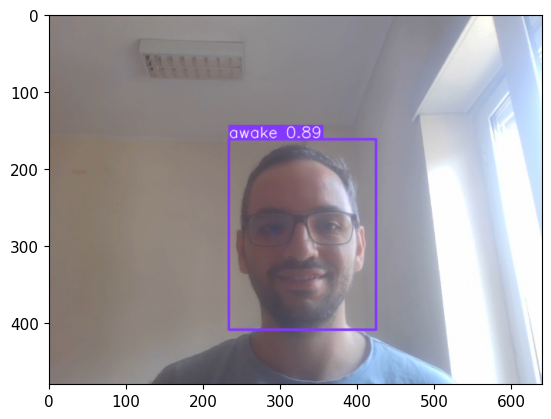

In [ ]:
img4 = os.path.join('data2', 'images', 'awake.bdc5b458-0cef-11ee-8253-b5d8964c7851.jpg')
results = model(img4)
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

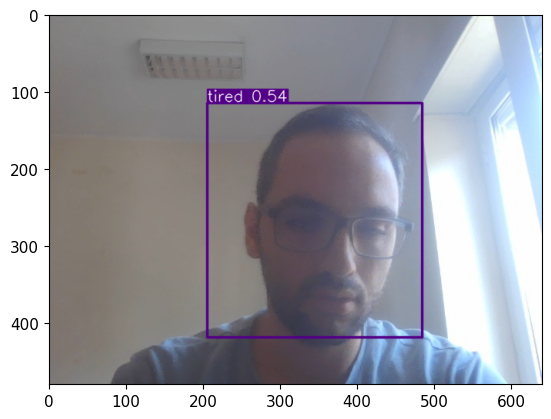

In [ ]:
img5 =os.path.join('data2', 'images', 'tired.2a90b8bc-0cf0-11ee-97f0-b5d8964c7851.jpg')
results = model(img5)
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()